## Logistic Regression Hands on

* Load Iris Dataset from datasets library in python
* Create a dataframe of the dataset which also contains the target variable

### Preprocessing 
* Find number of unique target class
* Find missing values

### Visualization
* Use seaborn to create boxplot of all the variables in the dataset.
* Use seaborn to draw violin plot of all the variables 
* Swarm plot of sepal width vs petal length
* Regression plot using seabron for petal width and sepal length 
* Regression plot using seabron for target and sepal length

### Model Building 

Perform the following:

* Train test split
* Cross Validation on the dataset
* Run Logistic Regression
* Check Accuracy 
* Build a confusion Matrix
* Talk about true poitives and negetives



In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [46]:
df['target'].unique()

array([0, 1, 2])

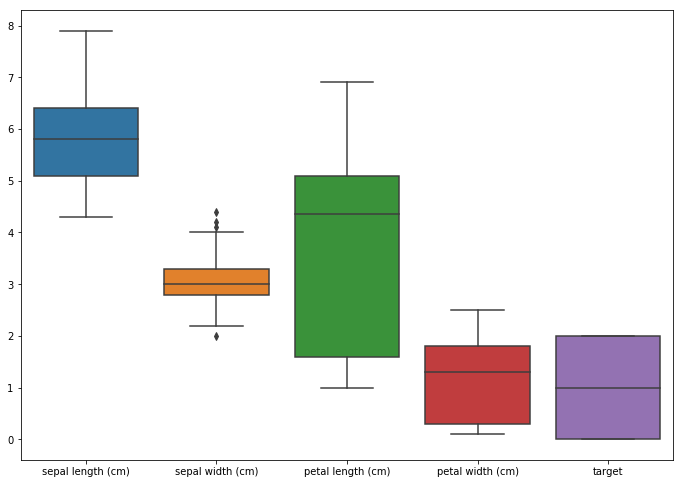

In [21]:
f, ax = plt.subplots()
f.set_size_inches(11.7, 8.27)
sns.boxplot(data=df)

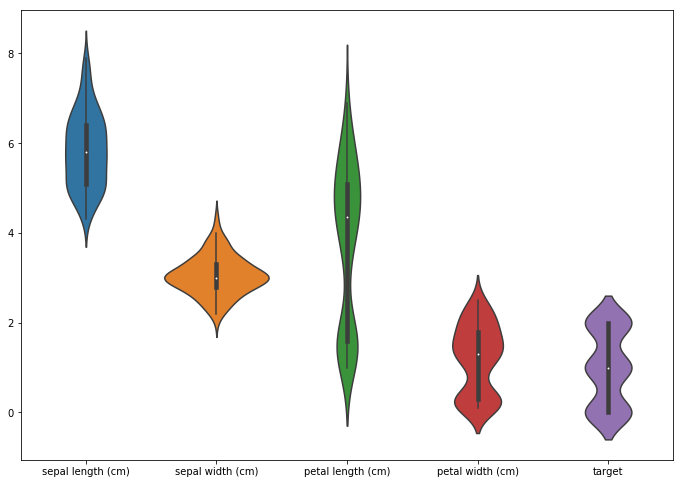

In [28]:
f, ax = plt.subplots()
f.set_size_inches(11.7, 8.27)
sns.violinplot(data=df)

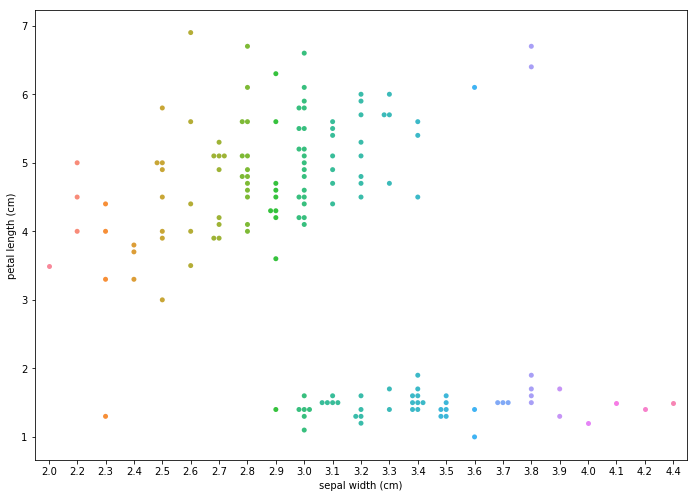

In [62]:
f, ax = plt.subplots()
f.set_size_inches(11.7, 8.27)
sns.swarmplot(x="sepal width (cm)", y="petal length (cm)", data=df)
plt.show()

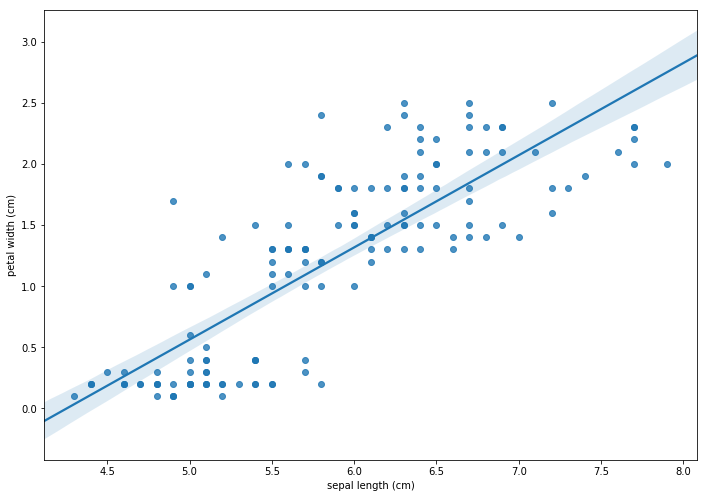

In [30]:
f, ax = plt.subplots()
f.set_size_inches(11.7, 8.27)
sns.regplot(x="sepal length (cm)", y="petal width (cm)", data=df)

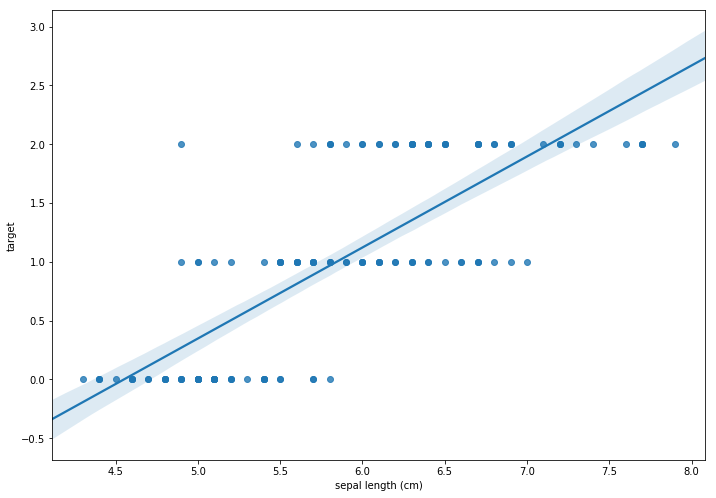

In [29]:
f, ax = plt.subplots()
f.set_size_inches(11.7, 8.27)
sns.regplot(x="sepal length (cm)", y="target", data=df)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

y=df['target']
x=df.copy()
x.drop(['target'], axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

logit=LogisticRegression()

scores = cross_val_score(logit, X_train, y_train, cv=5,scoring='accuracy')
print(scores)

[0.84       0.96       0.95833333 1.         0.90909091]


In [91]:
pred=logit.predict(X_test)
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2])

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.9333333333333333

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred,y_test)

array([[16,  0,  0],
       [ 0, 20,  1],
       [ 0,  3, 20]])

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.95      0.87      0.91        23
          2       0.87      0.95      0.91        21

avg / total       0.94      0.93      0.93        60

